<a href="https://colab.research.google.com/github/HARRSHAN/autism_prediction/blob/main/autism_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.preprocessing import LabelEncoder
 from imblearn.over_sampling import SMOTE
 from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.ensemble import RandomForestClassifier
 from xgboost import XGBClassifier
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
 import pickle


In [ ]:
#read csv data to pandas dataframe
df = pd.read_csv("/content/train.csv")

In [ ]:
df.shape

(800, 22)

In [ ]:
df.head()
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# AGE TO INT
df['age'] = df['age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
  print(col,df[col].nunique())

ID 800
A1_Score 2
A2_Score 2
A3_Score 2
A4_Score 2
A5_Score 2
A6_Score 2
A7_Score 2
A8_Score 2
A9_Score 2
A10_Score 2
age 79
gender 2
ethnicity 12
jaundice 2
austim 2
contry_of_res 56
used_app_before 2
result 800
age_desc 1
relation 6
Class/ASD 2


In [ ]:
for col in df.columns:
  numerical_features =['ID',"age","result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
# DROPPING ID AND AGE_DESC COLUMNS
df = df.drop(columns=['ID','age_desc'])


In [ ]:
df.shape

(800, 20)

In [ ]:
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#define the mapping dictionary for conutry names
mapping = {
    "Viet Nem": "vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"
}

#replce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
#taget class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**insights:**

    1.missing values ion ethnicity & relation
    2.age_desc column has only 1 unique value.so removed
    3.fixed country names
    4.identified class imbalance in targat class

Exploratory data analysis (EDA)

In [ ]:
df.shape


(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**univariate** **analysis**

UA-numerical columns:
      

*   age
*   result



In [ ]:
#set the desired theme
sns.set_theme(style="darkgrid")

mean: 27.96375
median: 24.0


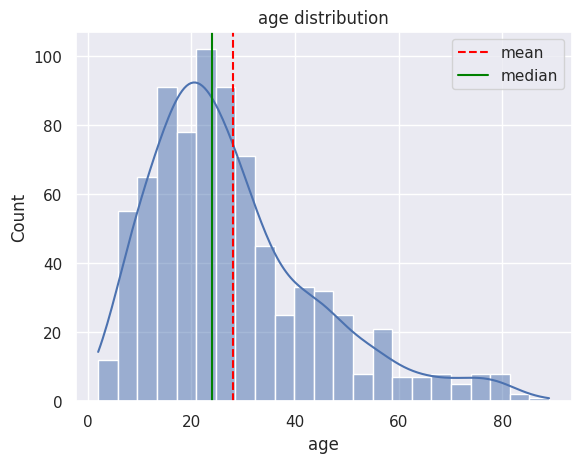

In [ ]:
#histogram for age
sns.histplot(df["age"],kde=True)
plt.title("age distribution")

#cal mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("mean:",age_mean)
print("median:",age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color="red",linestyle="--",label="mean")
plt.axvline(age_median,color="green",linestyle="-",label="median")



#add legend
plt.legend()

plt.show()

mean: 8.537303106501248
median: 9.605299308


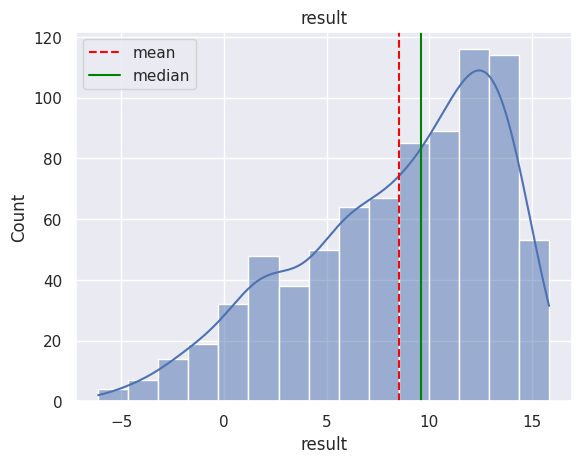

In [ ]:
#histogram for result
sns.histplot(df["result"],kde=True)
plt.title("result")

#cal mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("mean:",result_mean)
print("median:",result_median)

#add vertical lines for mean and median
plt.axvline(result_mean,color="red",linestyle="--",label="mean")
plt.axvline(result_median,color="green",linestyle="-",label="median")



#add legend
plt.legend()

plt.show()

box plots for identifing outiers in numerical **columns** **bold text**

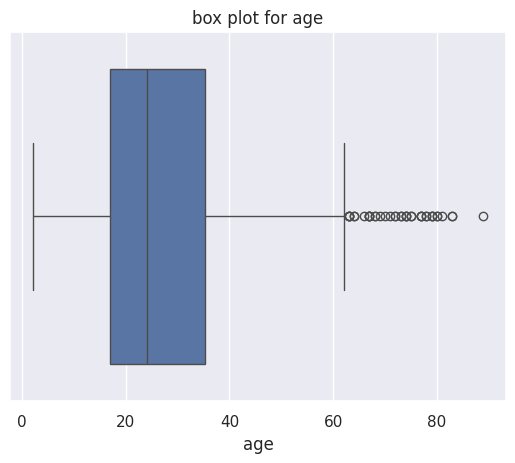

In [ ]:
#box plot
sns.boxplot(x=df["age"])
plt.title("box plot for age")
plt.xlabel("age")
plt.show()


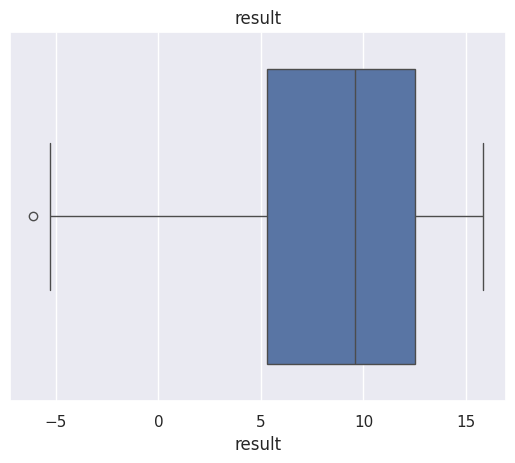

In [ ]:
#box plot
sns.boxplot(x=df["result"])
plt.title("result")
plt.xlabel("result")
plt.show()


In [ ]:
#count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers=df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("number of outliers in age:",len(age_outliers))

number of outliers in age: 39


In [ ]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [ ]:
#count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers=df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print("number of outliers in result:",len(result_outliers))

number of outliers in result: 1


In [ ]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


univariate analysis of categorical columns

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

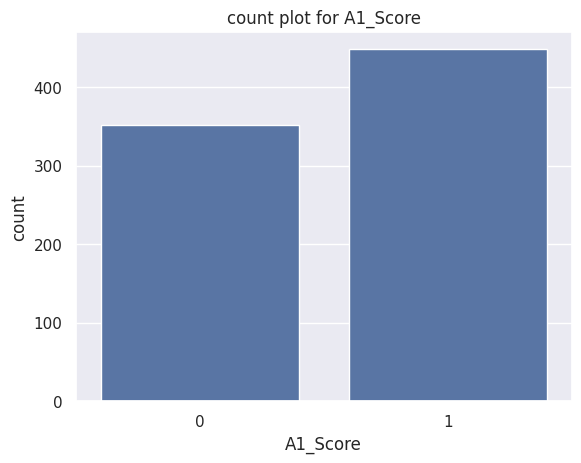

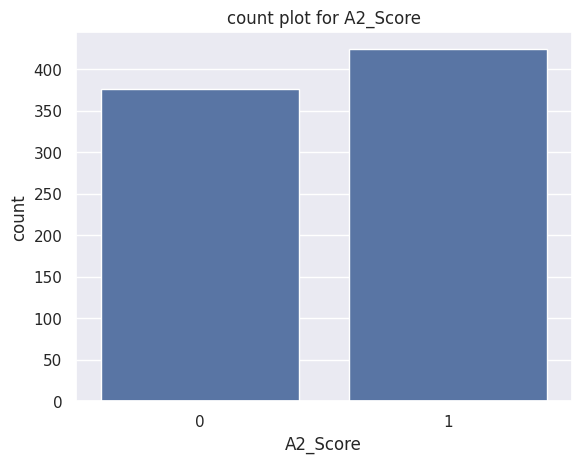

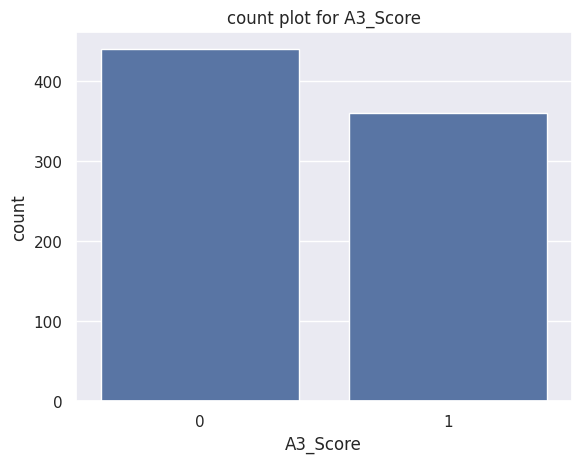

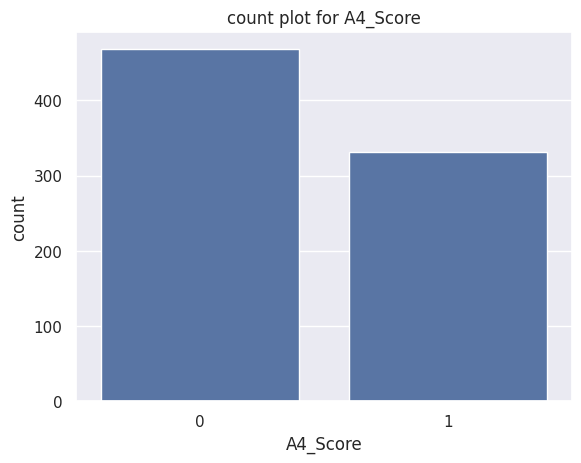

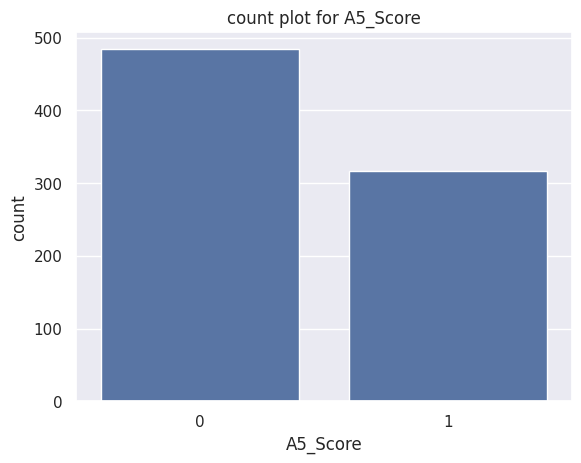

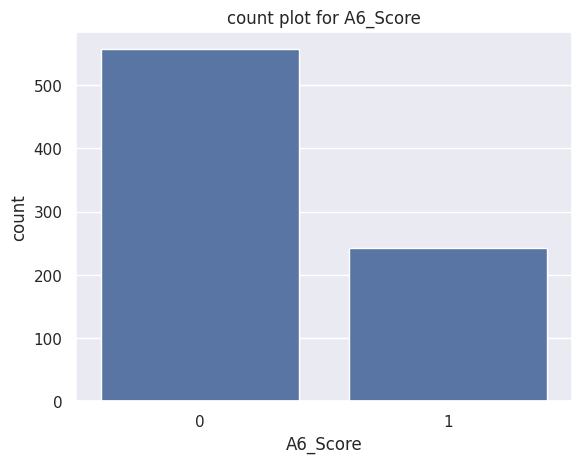

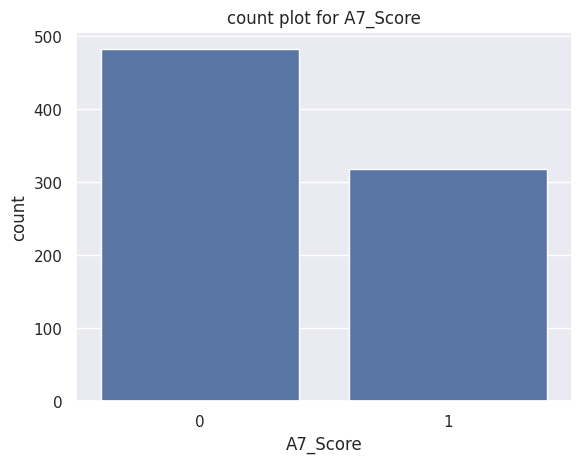

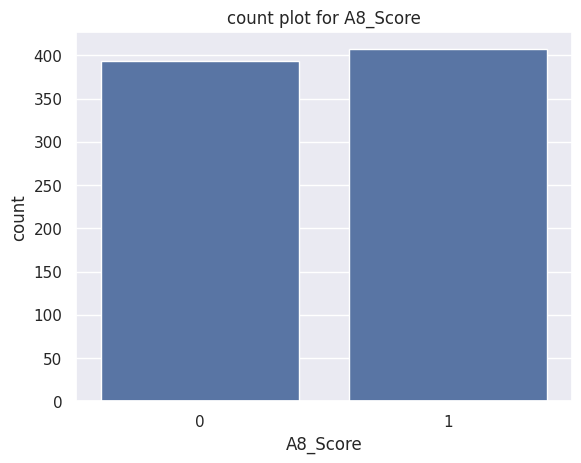

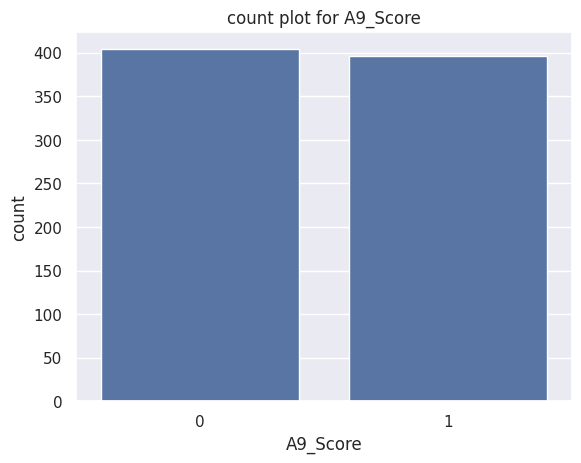

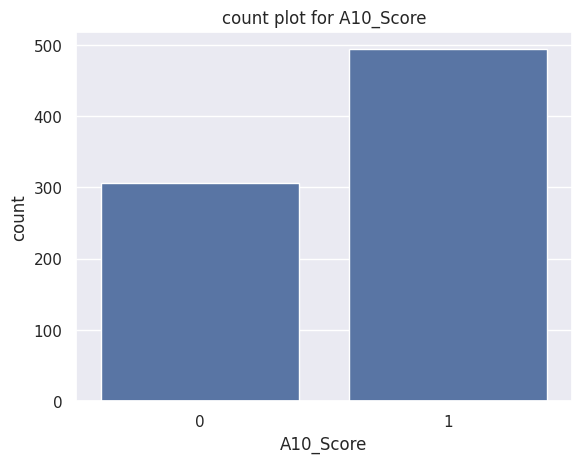

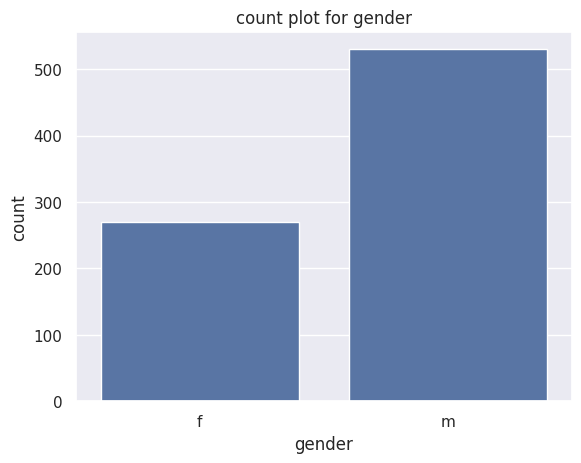

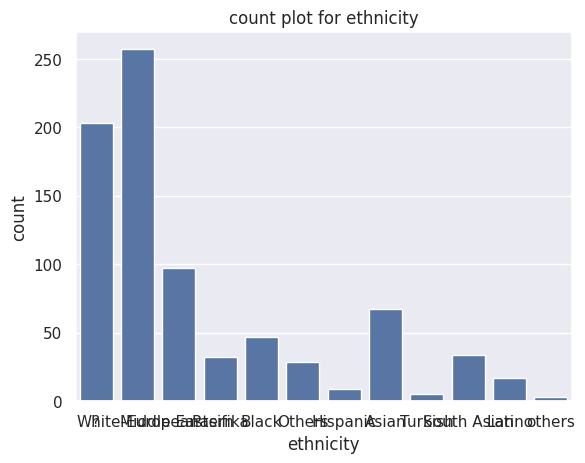

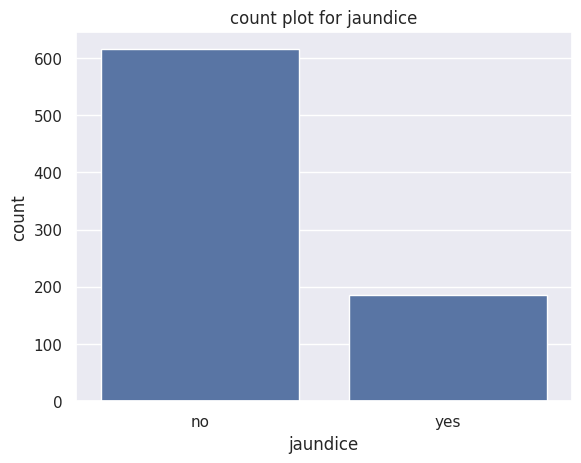

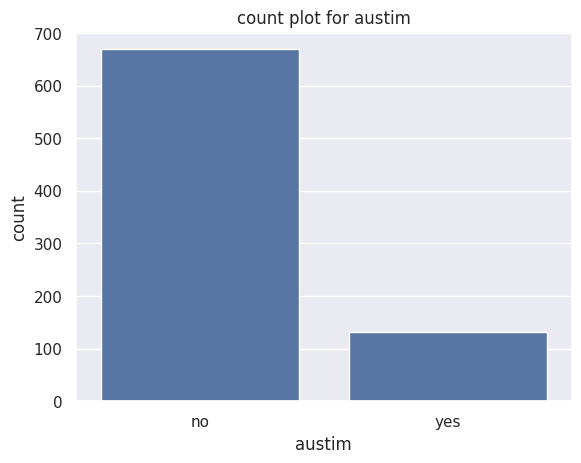

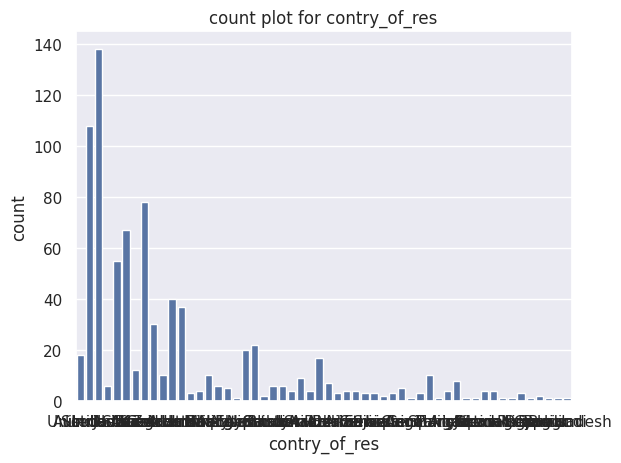

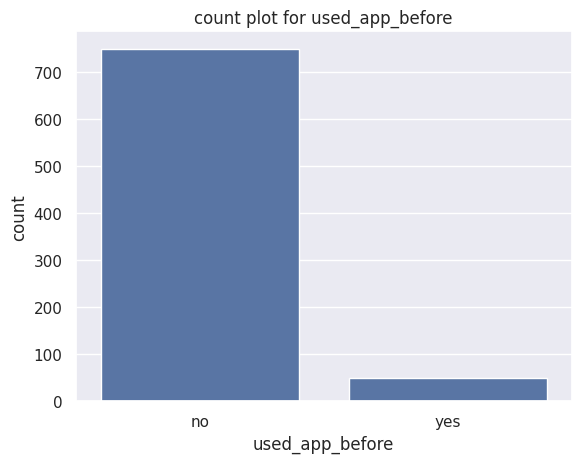

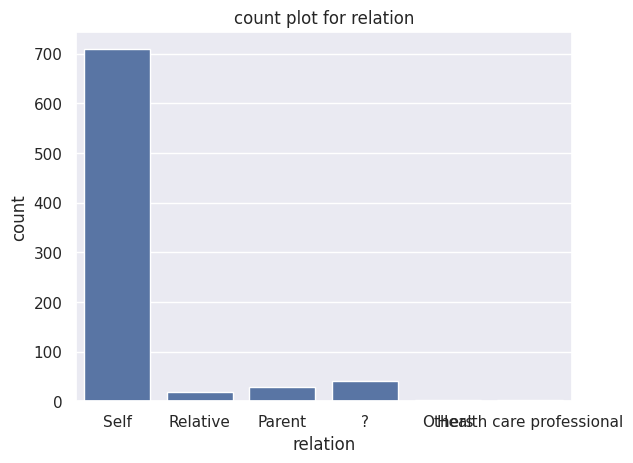

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

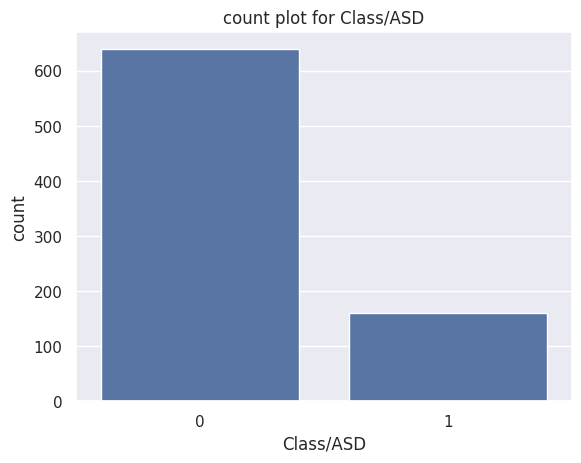

In [ ]:
# countplot for target column(class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
df['gender'].value_counts()

,count
gender,
m,530
f,270


handle missing value in ethnicity and relation column

In [ ]:
df['ethnicity'] = df['ethnicity'].replace({"?":"Others","others":"Others"})

In [ ]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df["relation"] = df["relation"].replace(
    {"?":"Others",
     "Relative" : "Others",
     "Parent" : "Others",
     "Health care professional" : "Others",
     "Relative" : "Others",
     "Relative" : "Others",}
    )

In [ ]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


LABLE ENCODING


In [ ]:
# identify columns with object data types
object_columns = df.select_dtypes(include =["object"]).columns

In [ ]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders = {}

#apply lable encoding and store the encorders
for column in object_columns:
  label_encorder = LabelEncoder()
  df[column] = label_encorder.fit_transform(df[column])
  encoders[column] = label_encorder    # saving the encorder for this columns



  # save the encoders as a pickle file
  with open("label_encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


 **bivariate** **analysis**

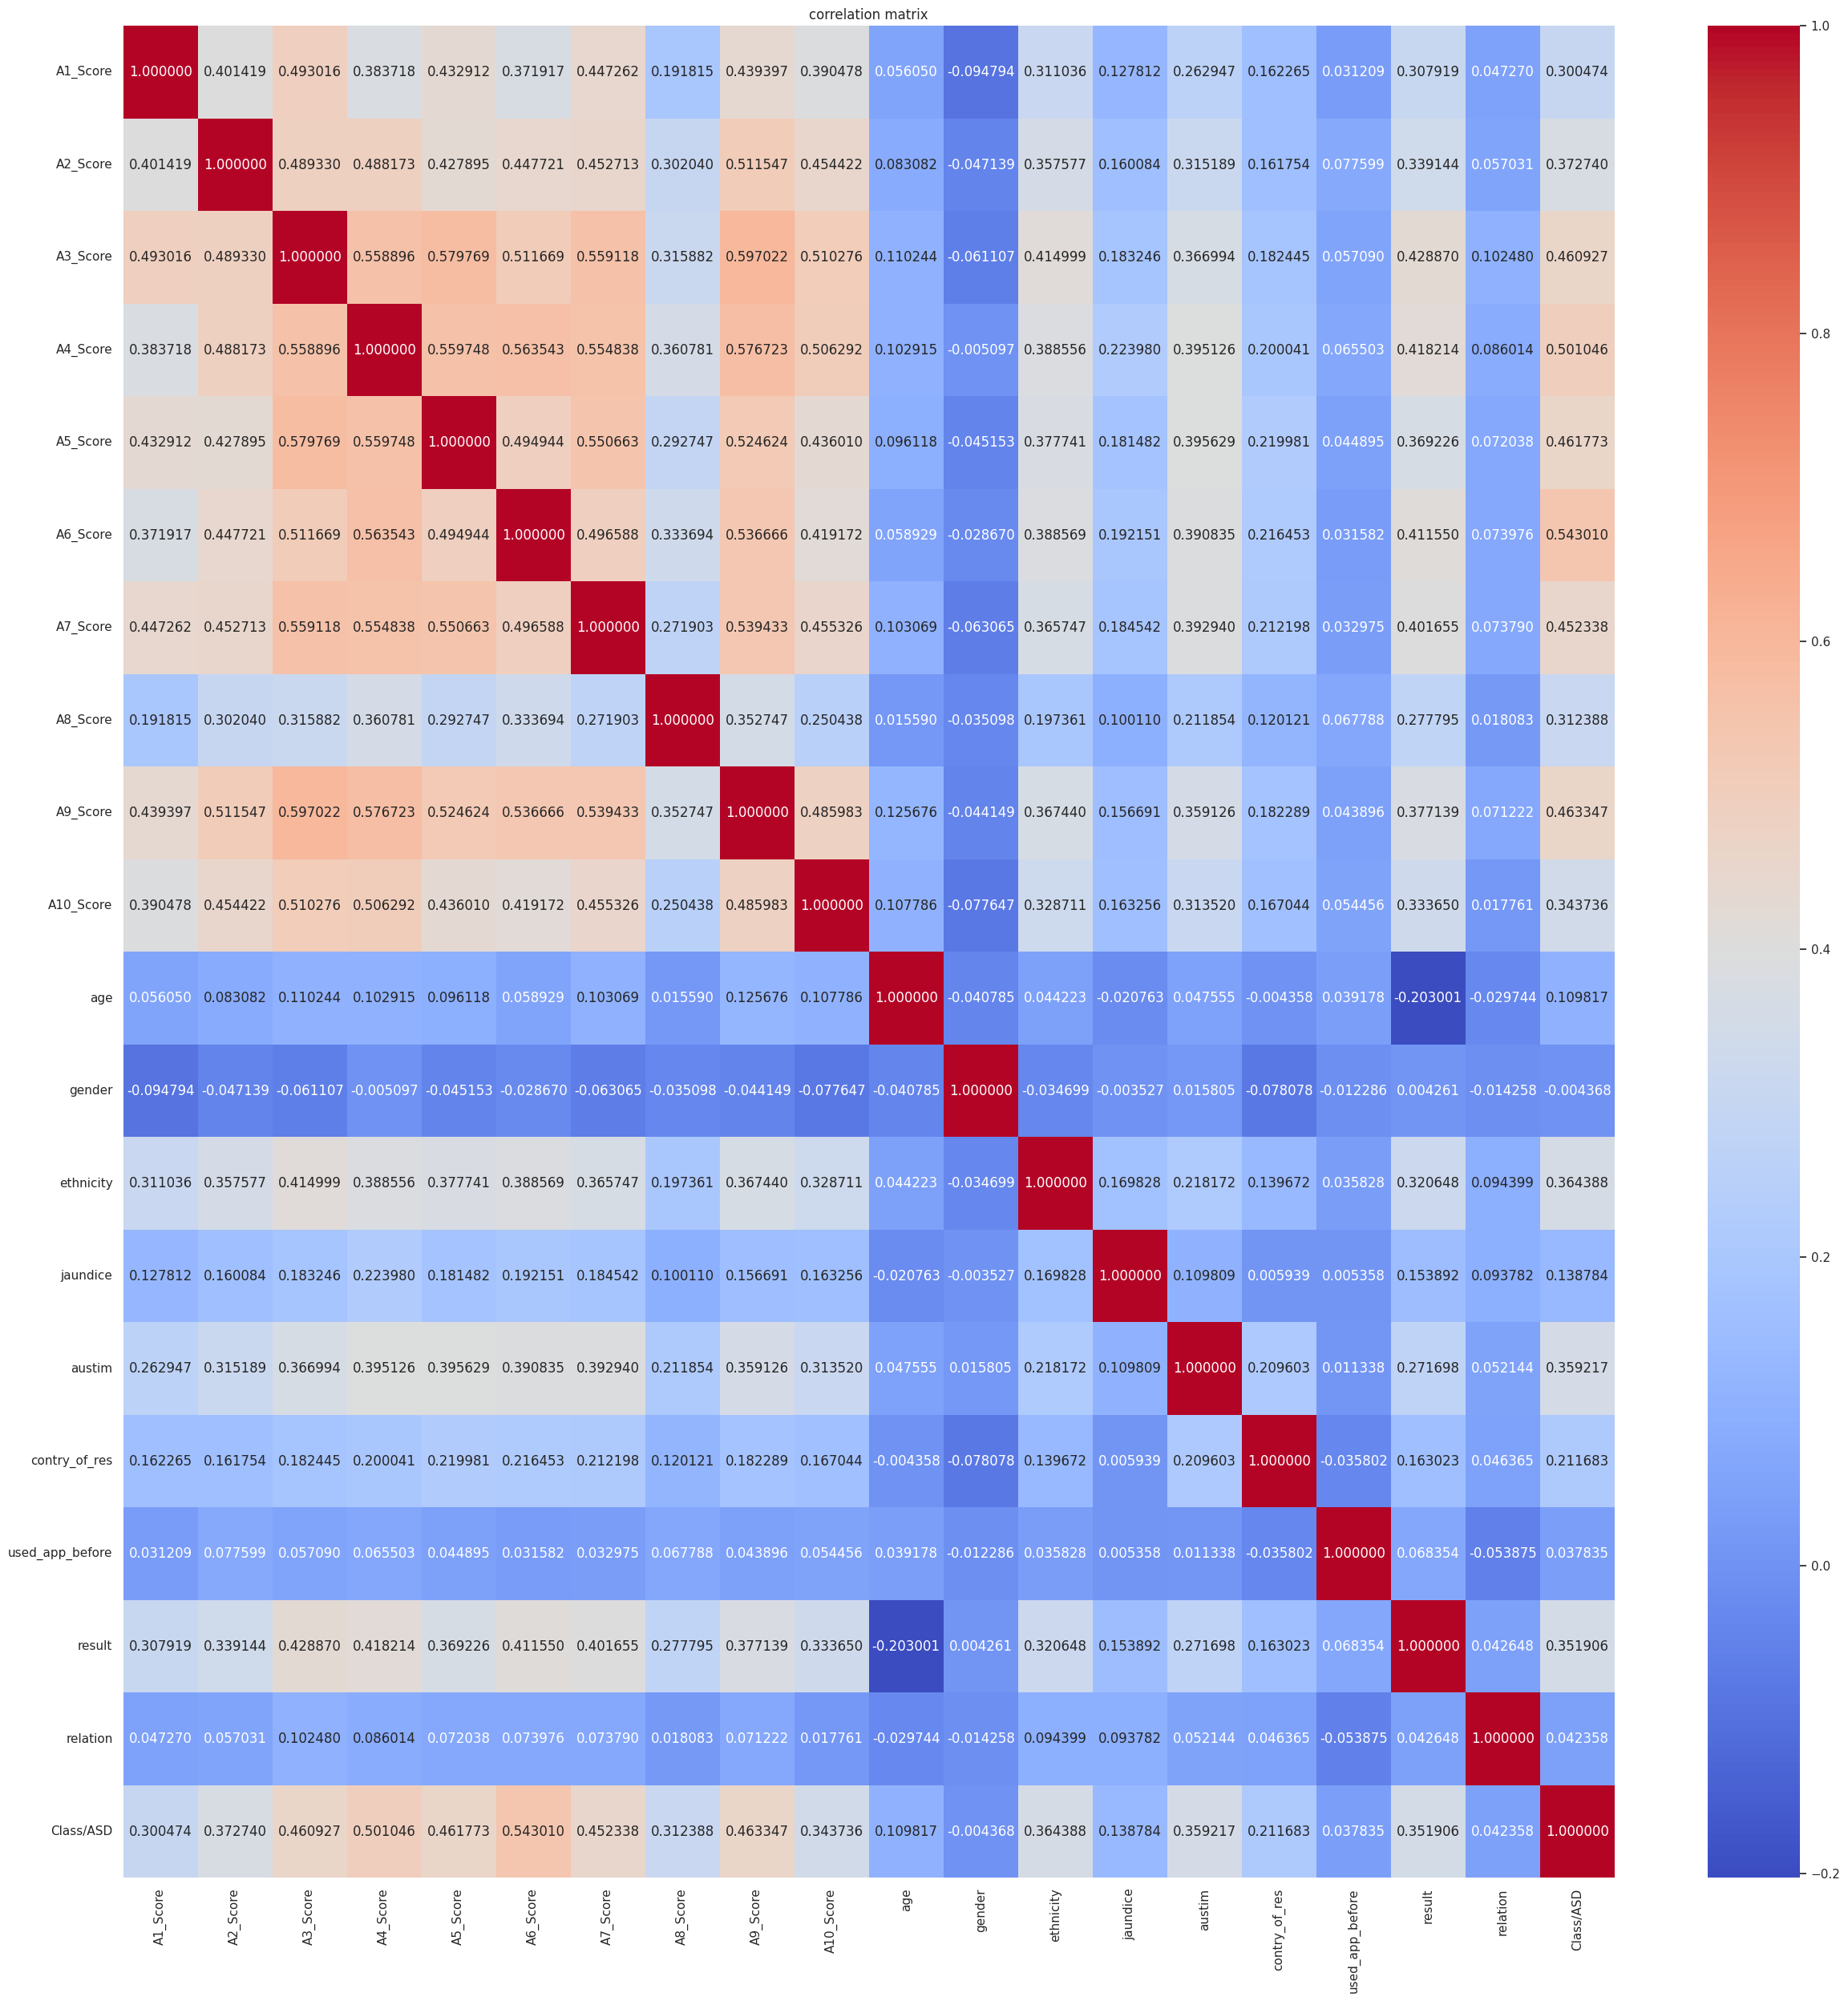

In [ ]:
# correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", fmt = "2f")
plt.title("correlation matrix")
plt.show()

**INSIGHTS FROM EDA:**

- FEW OUTLIERS IN NUMERICAL COLUMNS(age,results)
- there is class imbalance in target column
- threr is class imbalance in the categorical features
- we don't have any high correlated column
- performed label encoding and saved the encoders

***4.data preprocessing***

handling the outliners

In [ ]:
# function to replace the outliner with median
def replace_outliners_with_median(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  #replace outliers eith median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
# replace outliers in the 'age' columns

df = replace_outliners_with_median(df,"age")

# replace outliers in the 'result' columns
df = replace_outliners_with_median(df,"result")

In [ ]:
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [ ]:
df.shape

(800, 20)

**Train test split**

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
x = df.drop(columns=["Class/ASD"])
y = df['Class/ASD']

In [ ]:
print(x.shape)
print(y.shape)

(800, 19)
(800,)


In [ ]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(640, 19)
(160, 19)
(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1030, 19)
(1030,)


In [ ]:
print(y_train.value_counts())
print(y_train_smote.value_counts())

Class/ASD
0    515
1    125
Name: count, dtype: int64
Class/ASD
1    515
0    515
Name: count, dtype: int64


**5. Model Training**

In [ ]:
# dictionary of classifiers
models = {
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()
}


In [ ]:
# dictionary to store the cor validation result
cv_scores = {}

#PERFORM S_FOLD CROSS VALIDTION FOR EACH MODEL
for model_name,model in models.items():
  print(f"training {model_name} with default parameters...")
  scores = cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring = "accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross_validation scores: {np.mean(scores):.2f}")
  print("-"*50)

training DecisionTreeClassifier with default parameters...
DecisionTreeClassifier Cross_validation scores: 0.86
--------------------------------------------------
training RandomForestClassifier with default parameters...
RandomForestClassifier Cross_validation scores: 0.92
--------------------------------------------------
training XGBClassifier with default parameters...
XGBClassifier Cross_validation scores: 0.90
--------------------------------------------------


In [ ]:
cv_scores

{'DecisionTreeClassifier': array([0.82038835, 0.87378641, 0.8592233 , 0.86893204, 0.86893204]),
 'RandomForestClassifier': array([0.91262136, 0.93203883, 0.90776699, 0.91747573, 0.90776699]),
 'XGBClassifier': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

**6. model selection & hyperparameter tuning**

In [ ]:
# initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
# hyperparameter girds for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50,100,200,500],
    "max_depth": [None, 10, 20, 30, 40, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50,100,200,500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

In [ ]:
# hyperparameter tuning for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchcv for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [ ]:
# ifit the models
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best parameters for Decision Tree:", random_search_dt.best_params_)


Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# get models with bast score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [ ]:
print(f"best model: {best_model}")
print(f"best cross-validation score: {best_score:.2f}")

best model: RandomForestClassifier(bootstrap=False, max_depth=70, random_state=42)
best cross-validation score: 0.93


In [ ]:
# save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [ ]:
# evaluate on test data
y_test_pred = best_model.predict(x_test)
print("ACCURACY SCORE:\n",accuracy_score(y_test,y_test_pred))
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_test_pred))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_test_pred))

ACCURACY SCORE:
 0.825
CONFUSION MATRIX:
 [[109  15]
 [ 13  23]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       124
           1       0.61      0.64      0.62        36

    accuracy                           0.82       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.83      0.82      0.83       160



**making a predictive system**

In [ ]:
df.head(25)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0
5,1,0,0,0,0,1,0,0,1,1,31.0,1,4,0,0,29,0,9.562117,1,0
6,1,0,0,0,0,0,1,1,1,0,28.0,0,6,0,0,51,0,7.984569,1,0
7,1,1,1,1,1,1,1,0,1,1,26.0,1,1,0,1,52,0,13.237898,1,1
8,1,1,1,1,0,0,0,1,1,1,48.0,1,9,0,0,12,0,-1.755774,1,0
9,0,0,0,0,0,0,0,1,0,1,24.0,0,5,1,0,34,0,14.922570,1,0


In [ ]:
inpu_data = (1,1,1,0,1,0,0,1,0,1,14.0,0,5,0,0,14,0,1.132228,1)

#changing input into numpy array
input_data_as_numpy_array = np.asarray(inpu_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print("PREDICTION OF ADS ::\n ",prediction)

if prediction[0] == 0:
  print("THE PERSON IS NOT ASD")
else:
  print("THE PERSON IS ASD")

PREDICTION OF ADS ::
  [0]
THE PERSON IS NOT ASD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
